# Lab 1 Evaluation

Names, Surnames, and Group : (to complete by 2 students)

DOUARRE Quentin, MARTHRIN-JOHN Lauric, 4ème IR SC

In the following, we consider the  (binarized) Compas dataset that we studied in the Lab

In [1]:
# IMPORTATION OF THE DATASET AND SOME LIBRARIES
import csv
import numpy as np
from matplotlib import pyplot as plt # for a good visualization of the trees

from utils import load_from_csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

from sklearn import datasets
from sklearn import svm
from sklearn import tree

train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")

In [2]:
#matrice des features associé à chaque personne
print (train_examples)

#oui ou non il a récidivé
print (train_labels)

[[1 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
[1 0 0 ... 1 0 1]


A decision tree configuration is a set of parameters that one can use to build decision trees. Propose 6 configurations that are likely to provide different topologies and caracteristics

In [3]:
treesParameters = [
    #1 topologie and characteristic
    {
        'splitter':'best',
        'max_depth': 2,
        'min_samples_leaf':  20
    },
    
    #2 topologie and characteristic
    {
        'splitter':'random',
        'max_depth': 5,
        'min_samples_leaf':  40
    },
    
    #3 topologie and characteristic
    {
        'splitter':'best',
        'max_depth': 10,
        'min_samples_leaf':  20
    },
    
    #4 topologie and characteristic
    {
        'splitter':'best',
        'max_depth': 50,
        'min_samples_leaf':  10
    },
    
    #5 topologie and characteristic
    {
        'splitter':'random',
        'max_depth': 100,
        'min_samples_leaf':  80
    },
    
    #6 topologie and characteristic
    {
        'splitter':'best',
        'max_depth': 100,
        'min_samples_leaf':  100
    },
]
nbTree = len(treesParameters)

Train a decision tree for each of the previous configurations on the full dataset

Propose an evaluation in terms of training and testing accuracies using $5$-cross validation on two decision trees that have different typologies

In [4]:
# 5-cross validation on two decision trees
treesParameterselected = treesParameters[:2]
nbTree = len(treesParameterselected)

0.65 accuracy with a standard deviation of 0.02


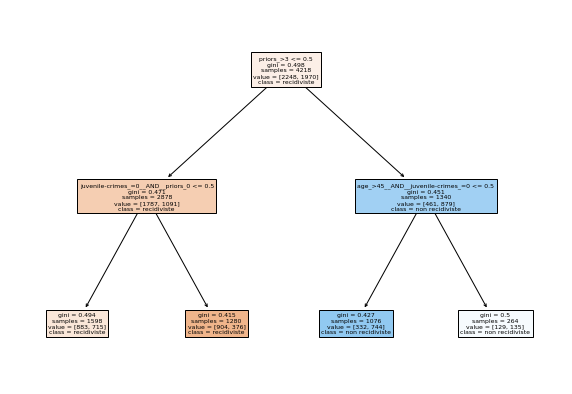

0.67 accuracy with a standard deviation of 0.03


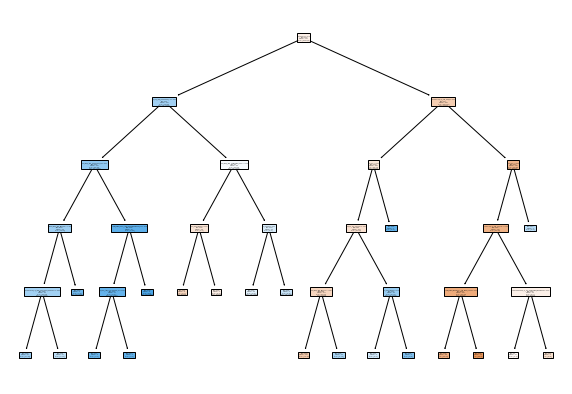

In [5]:
for j in range (nbTree) :
    parameters= treesParameters[j]
    
    #FITTING INPUTS AND OUTPUTS
    clf = tree.DecisionTreeClassifier(splitter=parameters['splitter'], max_depth =parameters['max_depth'], min_samples_leaf =parameters['min_samples_leaf'])
    #Dataset splitted 80% training data, 20% test data
    X_train, X_test, y_train, y_test = train_test_split(train_examples, train_labels, test_size=0.2, random_state=1)
    #Cross validation
    clf = clf.fit(X_train, y_train)
    
    scores = cross_val_score(clf, X_test, y_test, cv=5)
    
    # Visualization 
    # summarize first 5 rows
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
    plt.figure(figsize=(10,7))
    
    tree.plot_tree(clf, feature_names= (features), class_names= ("recidiviste", "non recidiviste"), filled=True)
    plt.show()

Propose an experimental study that shows the transition phase from underfitting to overfitting 

In [6]:
parameters = treesParameters[0]
k = np.arange (1,50)
clf = tree.DecisionTreeClassifier(splitter=parameters['splitter'], max_depth=parameters['max_depth'], min_samples_leaf=parameters['min_samples_leaf'])

val_score,train_score = validation_curve(clf, train_labels, train_examples, k, cv=5)

plt.plot(k, val_score.mean(axis=1), label = 'validation')
plt.plot(k, train_score.mean(axis=1), label = 'train')

plt.ylabel('score')
plt.xlabel('recidiviste')
plt.legend()



TypeError: validation_curve() takes 3 positional arguments but 4 positional arguments (and 1 keyword-only argument) were given

Construct the confusion matrix on a particular good configuration (after explaining your choice)

In [ ]:
parameters= treesParameters[0]

# we should see the split
test_data_Y = train_test_split(train_examples, train_labels, test_size=0.2, random_state=0)

#Matrice confusion
y1_predict = clf.predict(test_data_Y)

Provide an evaluation of the fairness of the model based on the False Positive Rate